In [27]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [28]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df['age']=pd.cut(df['age'],bins=3,labels=['Young','Middle','Old'])
df['chol']=pd.cut(df['chol'],bins=3,labels=['Low','Normal','High'])                

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Old,1,3,145,Low,1,0,150,0,2.3,0,0,1,1
1,Young,1,2,130,Low,0,1,187,0,3.5,0,0,2,1
2,Young,0,1,130,Low,0,0,172,0,1.4,2,0,2,1
3,Middle,1,1,120,Low,0,1,178,0,0.8,2,0,2,1
4,Middle,0,0,120,Normal,0,1,163,1,0.6,2,0,2,1


In [33]:
model=BayesianNetwork(
    [
        ('age','target'),
        ('chol','target'),
        ('cp','target'),
        ('target','thalach')
        
    ]
)

In [34]:
model.edges()

OutEdgeView([('age', 'target'), ('target', 'thalach'), ('chol', 'target'), ('cp', 'target')])

In [36]:
model.fit(df,estimator=MaximumLikelihoodEstimator)

In [37]:
infer=VariableElimination(model)

In [42]:
result=infer.query(variables=['target'],evidence={'age':'Old','chol':'High'})
print(result)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3564 |
+-----------+---------------+
| target(1) |        0.6436 |
+-----------+---------------+


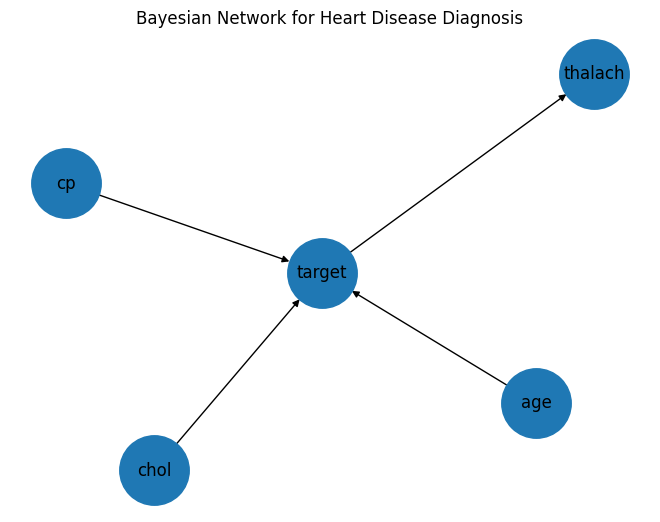

In [56]:
import matplotlib.pyplot as plt
import networkx as nx

graph=nx.DiGraph()

for edge in model.edges():
    graph.add_edge(edge[0],edge[1])

pos=nx.spring_layout(graph,k=0.8)
nx.draw(graph,pos,with_labels=True,arrows=True,node_size=2500)
plt.title('Bayesian Network for Heart Disease Diagnosis')
plt.show()
